In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pickle
from collections import Counter
plt.rcParams['figure.figsize'] = [16, 6]

# General Conclusions from Transcripts

In [2]:
# Loading the pickle files
cleaned_data = pd.read_pickle('comedians_cleaned_data.pkl')
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
comedians = ['Dave Chappelle','Bill Burr', 'Jim Jefferies', 'John Mulaney','Anthony Jeselnik', 'Mike Birbiglia','Joe Rogan']

In [ ]:
data

In [ ]:
# Finding top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[comedians[c]]= list(zip(top.index, top.values))
    
top_dict

In [ ]:
# Combining list of top 30 words said by a comedian.
words = []
for i in range(len(comedians)):
    top = [word for (word, count) in top_dict[comedians[i]]]
    for t in top:
        words.append(t)
words

In [6]:
# Adding more stop_words to the list. Here I removed words which are said by all the comedians very frequently
add_stop_words = []
add_stop_words = [word for word, count in Counter(words).most_common() if count >6]
add_stop_words 

['wa',
 'like',
 'know',
 'just',
 'im',
 'people',
 'dont',
 'thats',
 'right',
 'thing']

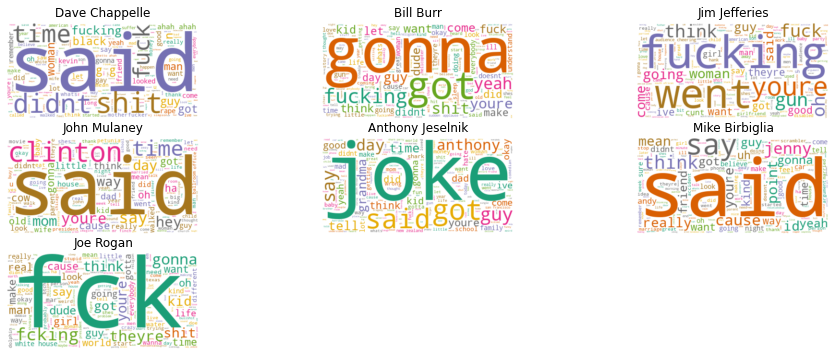

In [7]:
# Creating word cloud for top 30 words said by each comedian after removing the words said by each comedian
from wordcloud import WordCloud
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",max_font_size=200, random_state=50)
for index, comedian in enumerate(data.columns):
    wc.generate(cleaned_data.Transcript[comedian])
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedians[index])
    
plt.show()

# Conclusion:


*   Bill Burr, Jim Jefferies and Joe Rogan use f-word a lot.  
*   Anthony Jeselink uses word joke a lot. May be tells a lot of jokes in his comedy sets.
*   Dave Chappelle, John Mulaney and Mike Birbiglia says "said" a lot of times. May be they tell about an incident telling what a person said.



In [8]:
# Finding number of unique words said by each comedian
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

unique_list

[665, 706, 658, 643, 564, 663, 667]

In [9]:
# Finding words said by each comeddian per minute
total_list = []
words_per_min = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
run_times = [59, 67, 73, 77, 58, 76, 79]
for i in range(len(run_times)):
  words_per_min.append(total_list[i]/run_times[i])

words_per_min

[54.42372881355932,
 66.7910447761194,
 53.02739726027397,
 40.20779220779221,
 41.206896551724135,
 49.1578947368421,
 43.56962025316456]

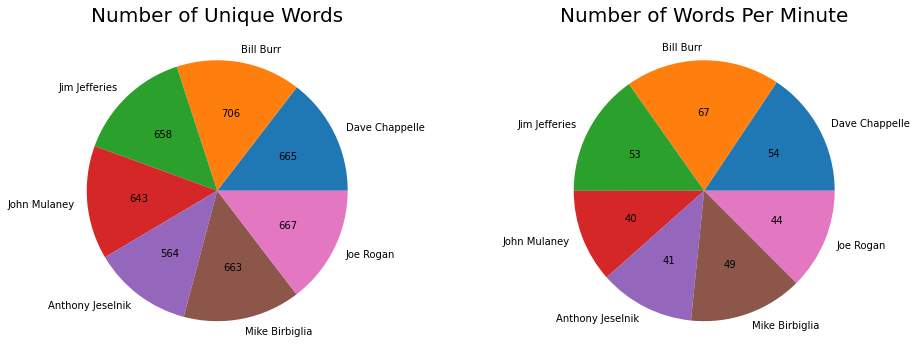

In [10]:
# Plotting number of unique words said by each comedian and Number of words said per minute by each comedian 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return val
    return my_autopct
    
plt.subplot(1, 2, 1)
plt.pie(unique_list,labels=comedians,autopct=make_autopct(unique_list))
plt.title('Number of Unique Words', fontsize=20)


plt.subplot(1, 2, 2)
plt.pie(words_per_min,labels=comedians,autopct=make_autopct(words_per_min))
plt.title('Number of Words Per Minute', fontsize=20)

plt.show()


# Conclusion:

**Number of unique words (Vocabulary):**
*   Bill Burr uses a lot of different words i.e. his vocabulary is highest among the ones compared here. 
*   John Mulaney uses least number of different words i.e. his vocabulary is lowest among the ones compare here.

**Talking Speed:**
*   Bill Burr has the highest talking speed among the ones compared here. His talking speed is such that he speaks more than 1 word each second. 
*   John Mulaney has the lowest talking speed among the ones compared here.
*   Talking speed of Jim Jefferies and DAve Chappelle tells that on an average they speak one word every second.




In [11]:
# Finding the count of f-word and s-word said by the comedians
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
0,65,46
1,107,64
2,119,20
3,4,6
4,15,9
5,0,1
6,0,38


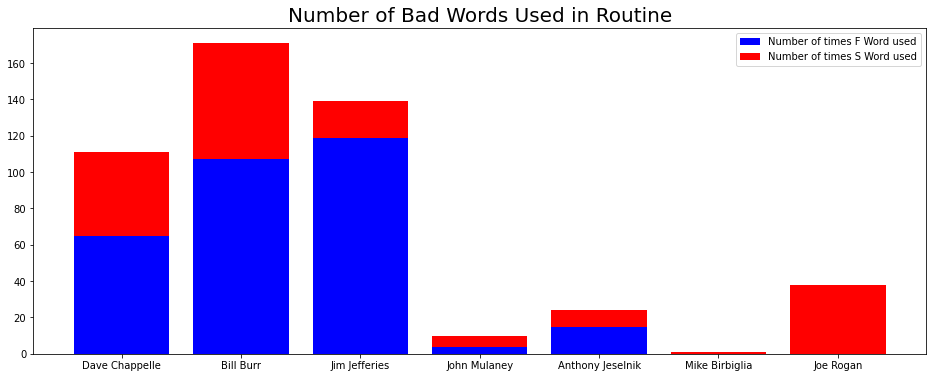

In [12]:
# Plot to compare the count of bad words said by the comedians
x=[]
y1=[]
y2=[]
for i, comedian in enumerate(data_profanity.index):
    x.append(comedians[i])
    y1.append(data_profanity.f_word.loc[comedian])
    y2.append(data_profanity.s_word.loc[comedian])

plt.bar(x, y1, color='b')
plt.bar(x, y2,bottom = y1, color='r')
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.legend(["Number of times F Word used", "Number of times S Word used"])
plt.show()

# Conclusion:

*   Bill Burr uses f-word and s-word most of the times among all.
*   Mike Birbiglia rarely used a curse word. 
*   Joe Rogan donot use f-word but uses s-word a lot as compared to others.
*   John Mulaney ad Anthony Jeselink occasionally uses a curse word. I would like to hear them as they donot use curse words a lot. 



In [13]:
# Finding the count of words related to friend or family said by each comedian
fam = data.transpose()[['friend','kid', 'family']]
family_words = pd.concat([fam.friend, fam.kid+fam.family], axis=1)
family_words.columns = ['friend', 'family']
family_words

,friend,family
0,15,6
1,8,43
2,7,23
3,15,33
4,6,31
5,26,4
6,7,38


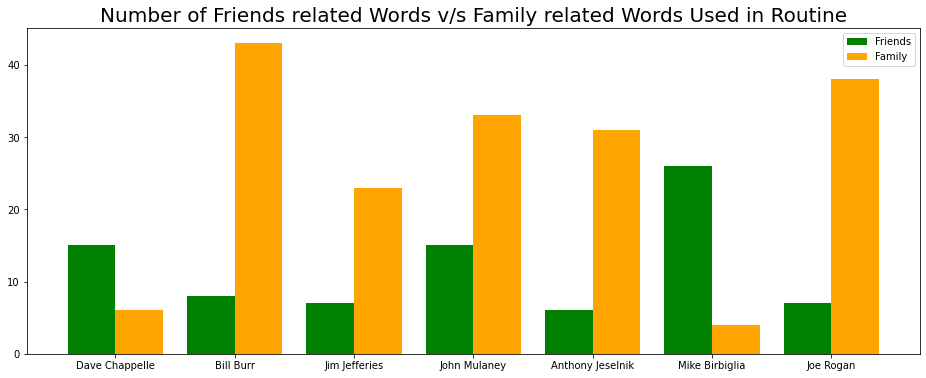

In [14]:
# Plot to compare the number of times a comedian talked about family of friend
x1=[]
x2=[]
y1=[]
y2=[]
for i, comedian in enumerate(family_words.index):
    x1.append((2*i)-0.4)
    x2.append((2*i)+0.4)
    y1.append(family_words.friend.loc[comedian])
    y2.append(family_words.family.loc[comedian])
  
plt.bar(x1, y1, color='green')
plt.bar(x2, y2, color='orange')
plt.xticks([r*2 for r in range(len(comedians))],comedians)
plt.title('Number of Friends related Words v/s Family related Words Used in Routine', fontsize=20)
plt.legend(["Friends", "Family"])
plt.show()


# Conclusion:

*   Dave Chappelle and  Mike Birbiglia talks more about friends as compared to family.
*   Other Comedians talk more about family as compared to friends.
*   Every comedian do talk about family and friends in their comedy set.

